# Unsupervised Machine Learning Project
## Task 1: Mental Health in Technology-related Jobs

**Dataset:**
Loading the file from OSMH Mental Health in Tech Survey 2022 
[Link](https://www.kaggle.com/datasets/osmihelp/osmh-mental-health-in-tech-survey-2022)

## Naming Conventions for Features 

**Snake_case** for all names (e.g., mental_health_benefits).

**Lowercase only**, words separated by underscores _.

**Short but descriptive** names (avoid very long phrases).

**No "column", "field", or similar** redundant words in names.

**Binary features** will use is_ or has_ prefixes when helpful (e.g., is_tech_company).

**Score or ordered features** will end with _score (e.g., comfort_score, mental_disorder_presence_score).

load pandas, load the dataset, show the number of rows and columns

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

df = pd.read_csv('responses.csv')
df.shape

(164, 126)

Looped through all columns to display value counts (including NaNs) for quick data overview and missing value detection.

In [2]:
for col in df.columns:
    print(f"\n📌 {col}")
    print(df[col].value_counts(dropna=False))
    print("-" * 60)


📌 #
#
454yabpvj5ekod27qm454yabpu6ww4fa    1
turfs5uwaygy96omjyvmxturfaq4tqpm    1
1hb89b2fyz03jg1hdvv3unu46hmug4lb    1
88shtlfnzinq2nrbw1ib88shju9q7xxh    1
8y9n53igp152mvon6woisdiq8y9n53ig    1
                                   ..
oowr56xyu77op8nyo4oowr56iwz2pmnw    1
3fyeyiy081k3fyoq7t70yt6rxl450d4k    1
88l3evhohjbhp9l88lgjjz32not3r1uz    1
ofogcwg20kw7sij7d0ofogcwxq8f0u17    1
upyzk52ogg8fdmc2ovg505upyzk52t5m    1
Name: count, Length: 164, dtype: int64
------------------------------------------------------------

📌 *Are you self-employed?*
*Are you self-employed?*
0    124
1     40
Name: count, dtype: int64
------------------------------------------------------------

📌 How many employees does your company or organization have?
How many employees does your company or organization have?
NaN               40
26-100            36
More than 1000    31
100-500           25
6-25              18
500-1000          11
1-5                3
Name: count, dtype: int64
-----------------------

Renamed the column to is_self_employment and encoded values:

Response | Meaning | Encoding
|:-------|:-------|:-------|
1.0 | Yes | 1.0
0.0 | No | -1.0
NaN | Unknown | 0.0

In [3]:
df.rename(columns={'*Are you self-employed?*': \
                   'is_self_employment'}, inplace=True)

In [4]:
df['is_self_employment'] = df['is_self_employment'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)


No Ordinal Relationship: Since "company_size" categories like "1-5", "6-25", "26-100", and "More than 1000" are distinct categories, there’s no natural order between them.

Handle Unknown Separately: One-Hot Encoding will create a separate column for "Unknown", ensuring that it's treated as a distinct category instead of being treated as a middle or low range (which could happen if you label encode it).

In [5]:
df.rename(columns={'How many employees does your company or organization have?': \
                   'company_employees_number'}, inplace=True)

In [6]:
df['company_employees_number'] = \
    df['company_employees_number'].fillna('Unknown')

In [7]:
size_order = ['Unknown','1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
cat_type = CategoricalDtype(categories=size_order, ordered=True)

df['company_size'] = df['company_employees_number'].astype(cat_type)

In [8]:
df = pd.get_dummies(df, columns=['company_size'], drop_first=False)

The is_tech_company feature was encoded to reflect whether participants' employers are primarily tech companies:

Response | Meaning | Encoding
|:-------|:-------|:-------|
1.0 | Tech company | 1.0
0.0 | Non-tech company | -1.0
NaN | Unknown | 0.0


In [9]:
df.rename(columns = {'Is your employer primarily a tech company/organization?': \
                     'is_tech_company'}, inplace = True)

In [10]:
df['is_tech_company'] = df['is_tech_company'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)


Renamed the column to is_tech_role and encoded values:

Response | Meaning | Encoding
|:-------|:-------|:-------|
1.0 | Tech role | 1.0
0.0 | Non-tech role | -1.0
NaN | Unknown | 0.0


In [11]:
df.rename(columns = {'Is your primary role within your company related to tech/IT?': \
                     'is_tech_role'}, inplace = True)

In [12]:
df['is_tech_role'] = df['is_tech_role'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

Renamed the column to company_mental_health_benefits and encoded values:

Response | Meaning | Encoding
|:-------|:-------|:-------|
Yes | Mental health benefits available | 1.0
No | No benefits | -1.0
Not eligible for coverage / NA | No benefits | -1.0
NaN | Unknown | 0.0
I don't know | Unknown | 0.0



In [13]:
df.rename(columns = {'Does your employer provide mental health benefits as part of healthcare coverage?': \
                     'company_mental_health_benefits'}, inplace = True)

In [14]:
df['company_mental_health_benefits'] = \
    df['company_mental_health_benefits'].fillna("Unknown")

In [15]:
df['company_mental_health_benefits'] = \
    df['company_mental_health_benefits'].map({
        "I don't know": 0.0,
        'Unknown': 0.0,
        "Not eligible for coverage / NA": -1.0,
        'No': -1.0,
        'Yes': 1.0,
    })

Renamed the column to employer_mental_health_aid_awareness and encoded knowledge of employer-provided mental health care options:

Response | Meaning | Encoding
|:-------|:-------|:-------|
Yes | Aware of available options | 1.0
No | Not aware | -1.0
Unknown | Unknown | 0.0


In [16]:
df.rename(columns={'Do you know the options for mental health care available under your employer-provided health coverage?': \
                   'employer_mental_health_aid_awareness'},inplace=True)

In [17]:
df['employer_mental_health_aid_awareness'] = \
    df['employer_mental_health_aid_awareness'].fillna('Unknown')


In [18]:
df['employer_mental_health_aid_awareness'] = \
    df['employer_mental_health_aid_awareness'].map({
        'Yes': 1.0,
        'No': -1.0,
        'Unknown': 0.0
    })

The employer_mental_health_learning_resources feature was encoded to reflect whether employers provide resources for learning about mental health disorders and seeking help:

Response | Meaning | Encoding
|:-------|:-------|:-------|
Yes | Formal discussion held | 1.0
No | No formal discussion | -1.0
Unknown | Unknown | 0.0
I don't know | Unknown | 0.0


In [19]:
df.rename(columns= {'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': \
        'formal_mental_health_discussion'}, inplace=True)
          

In [20]:
df['formal_mental_health_discussion'] = \
    df['formal_mental_health_discussion'].fillna('Unknown')

In [21]:
df['formal_mental_health_discussion'] = \
    df['formal_mental_health_discussion'].map({
        'Yes': 1.0,
        'No': -1.0,
        'Unknown': 0.0,
        "I don't know": 0.0
    })

The employer_mental_health_learning_resources feature was encoded to reflect whether employers provide resources for learning about mental health disorders and seeking help:

Response | Encoding
|:-------|:-------|
Yes | 1.0
No | -1.0
Unknown | 0.0
I don't know | 0.0


In [22]:
df.rename(columns = {'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': \
    'employer_mental_health_learning_resources'}, inplace = True)

In [23]:
df['employer_mental_health_learning_resources'] = \
    df['employer_mental_health_learning_resources'].fillna('Unknown')

In [24]:
df['employer_mental_health_learning_resources'] = \
    df['employer_mental_health_learning_resources'].map({
        'Yes': 1.0,
        'No': -1.0,
        'Unknown': 0.0,
        "I don't know": 0.0
    })

Renamed the column to anonymity_protected and encoded values:

Response | Meaning | Encoding
|:-------|:-------|:-------|
Yes | Anonymity protected | 1.0
No | Anonymity not protected | -1.0
Unknown | Unknown | 0.0
I don't know | Unknown | 0.0


In [25]:
df.rename(columns = {'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?' :\
    'anonymity_protected'}, inplace = True)

In [26]:
df['anonymity_protected'] = \
    df['anonymity_protected'].fillna('Unknown')

In [27]:
df['anonymity_protected'] = \
    df['anonymity_protected'].map({
        'Yes': 1.0,
        'No': -1.0,
        'Unknown': 0.0,
        "I don't know": 0.0
    })

Renamed the column to mental_health_leave_ease_score and encoded the perceived ease of requesting mental health leave:

Response | Encoding
|:-------|:--------|
Very easy | 1.0
Somewhat easy | 0.5
Neither easy nor difficult / I don't know | 0.0
Somewhat difficult | -0.5
Difficult | -1.0


In [28]:
df.rename(columns = {'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?': \
    'mental_health_leave_ease_score'}, inplace = True)

In [29]:
df['mental_health_leave_ease_score'] = \
    df['mental_health_leave_ease_score'].fillna('Unknown')

In [30]:
df['mental_health_leave_ease_score'] = \
    df['mental_health_leave_ease_score'].map({
        'Very easy': 1.0,
        'Somewhat easy': 0.5,
        'Unknown': 0.0,
        "Neither easy nor difficult": 0.0,
        "I don't know": 0.0,
        'Somewhat difficult': -0.5,
        'Difficult': -1.0
    })

Renamed the column to coworker_comfort_discussion_physical_vs_mental and encoded comfort levels:

Response  | Encoding
|:-------|:-------|
Mental health | 1.0
Physical health |  -1.0
Unknown |  0.0
Same level of comfort for each | 0.0

In [31]:
df.rename(columns = {'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?': \
    'coworker_comfort_discussion_physical_vs_mental'}, inplace = True)

In [32]:
df['coworker_comfort_discussion_physical_vs_mental'] = \
    df['coworker_comfort_discussion_physical_vs_mental'].fillna('Unknown')

In [33]:
df['coworker_comfort_discussion_physical_vs_mental'] = \
    df['coworker_comfort_discussion_physical_vs_mental'].map({
        'Mental health': 1.0,
        'Physical health': -1.0,
        'Unknown': 0.0,
        "Same level of comfort for each": 0.0
    })

Renamed the column to supervisor_comfort_mental_health_discussion and encoded willingness to discuss mental health with a supervisor:

Response | Meaning | Encoding
|:-------|:-------|:-------|
Yes | Comfortable discussing | 1.0
No | Not comfortable | -1.0
Unknown | Unknown | 0.0
Maybe | Uncertain | 0.0



In [34]:
df.rename(columns = {'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?': \
    'supervisor_comfort_mental_health_discussion'}, inplace = True)

In [35]:
df['supervisor_comfort_mental_health_discussion'] = \
    df['supervisor_comfort_mental_health_discussion'].fillna('Unknown')

In [36]:
df['supervisor_comfort_mental_health_discussion'] = \
    df['supervisor_comfort_mental_health_discussion'].map({
        'Yes': 1.0,
        'No': -1.0,
        'Unknown': 0.0,
        "Maybe": 0.0
    })

The column 'Have you ever discussed your mental health with your employer?' was renamed to is_discussed_mental_health_with_employer. Missing values were filled with 0.0, and the column was encoded as follows:

| Response  | Encoding |
| :-------- | :------- |
| Yes (1.0) | 1.0      |
| No (0.0)  | -1.0     |
| Unknown   | 0.0      |


In [37]:
df.rename(columns = {'Have you ever discussed your mental health with your employer?' : \
    'is_discussed_mental_health_with_employer'}, inplace = True)

In [38]:
df['is_discussed_mental_health_with_employer'] = df['is_discussed_mental_health_with_employer'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

The column 'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.' was renamed to employer_mental_health_discussion_description. A new feature, employer_mental_health_openness_score, was created based on whether a description

| Description Provided | Openness Score |
| :------------------- | :------------- |
| Yes (non-null value) | 1.0            |
| No (null value)      | -1.0           |

This score represents whether the participant's employer was open to discussing mental health issues.

In [39]:
df.rename(columns={
    'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.': 
    'employer_mental_health_discussion_description'
}, inplace=True)

In [40]:
df['employer_mental_health_openness_score'] = df['employer_mental_health_discussion_description'].apply(
    lambda x: 1 if pd.notna(x) else -1
)

The column 'Would you feel comfortable discussing a mental health issue with your coworkers?' was renamed to coworker_comfort_mental_health_discussion. Missing values were filled with 'Unknown', and the responses were encoded as follows:

| Response | Encoding |
| :------- | :------- |
| Yes      | 1.0      |
| No       | -1.0     |
| Unknown  | 0.0      |
| Maybe    | 0.0      |


In [41]:
df.rename(columns = {'Would you feel comfortable discussing a mental health issue with your coworkers?':\
          'coworker_comfort_mental_health_discussion'}, inplace = True)

In [42]:
df['coworker_comfort_mental_health_discussion'] = \
    df['coworker_comfort_mental_health_discussion'].fillna('Unknown')

In [43]:
df['coworker_comfort_mental_health_discussion'] = \
    df['coworker_comfort_mental_health_discussion'].map({
        'Yes': 1.0,
        'No': -1.0,
        'Unknown': 0.0,
        "Maybe": 0.0
    })

The column 'Have you ever discussed your mental health with coworkers?' was renamed to is_discussed_mental_health_with_coworkers. The responses were encoded as follows:

| Response  | Encoding |
| :-------- | :------- |
| Yes (1.0) | 1.0      |
| No (0.0)  | -1.0     |
| Unknown   | 0.0      |


In [44]:
df.rename(columns={
    'Have you ever discussed your mental health with coworkers?': 
    'is_discussed_mental_health_with_coworkers'
}, inplace=True)

In [45]:
df['is_discussed_mental_health_with_coworkers'] = df['is_discussed_mental_health_with_coworkers'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

The column 'Describe the conversation with coworkers you had about your mental health including their reactions.' was renamed to coworker_mental_health_discussion_description. A new feature, coworker_mental_health_openness_score, was created based on whether a description was provided:

| Description Provided | Openness Score |
| :------------------- | :------------- |
| Yes (non-null value) | 1.0            |
| No (null value)      | -1.0           |

This score reflects the openness of coworkers in discussing mental health based on whether a description was provided.

In [46]:
df.rename(columns={
    'Describe the conversation with coworkers you had about your mental health including their reactions.': 
    'coworker_mental_health_discussion_description'
}, inplace=True)

In [47]:
df['coworker_mental_health_openness_score'] = df['coworker_mental_health_discussion_description'].apply(
    lambda x: 1.0 if pd.notna(x) else -1.0
)

The column 'Have you ever had a coworker discuss their or another coworker's mental health with you?' was renamed to is_coworker_discussed_mental_health_with_you. The responses were encoded as follows:

| Response  | Encoding |
| :-------- | :------- |
| Yes (1.0) | 1.0      |
| No (0.0)  | -1.0     |
| Unknown   | 0.0      |


In [48]:
df.rename(columns={
    'Have you ever had a coworker discuss their or another coworker\'s mental health with you?': 
    'is_coworker_discussed_mental_health_with_you'
}, inplace=True)

In [49]:
df['is_coworker_discussed_mental_health_with_you'] = df['is_coworker_discussed_mental_health_with_you'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

The column 'Describe the conversation your coworker had with you about their mental health (please do not use names).' was renamed to coworker_shared_mental_health_description. A new feature, coworker_shared_mental_health_openness_score, was created based on whether a description was provided:

| Description Provided | Openness Score |
| :------------------- | :------------- |
| Yes (non-null value) | 1.0            |
| No (null value)      | -1.0           |

This score reflects the openness of coworkers in sharing their mental health experiences based on whether a description was provided.

In [50]:
df.rename(columns={
    'Describe the conversation your coworker had with you about their mental health (please do not use names).': 
    'coworker_shared_mental_health_description'
}, inplace=True)

In [51]:
df['coworker_shared_mental_health_openness_score'] = df['coworker_shared_mental_health_description'].apply(
    lambda x: 1.0 if pd.notna(x) else -1.0
)

he column 'Overall, how much importance does your employer place on physical health?' was renamed to physical_health_importance_score. The scores were mapped to numerical values as follows:


| Rating | Mapped Score |
| :----- | :----------- |
| 10     | 1.0          |
| 9      | 0.8          |
| 8      | 0.6          |
| 7      | 0.4          |
| 6      | 0.2          |
| 5      | 0.0          |
| 4      | -0.2         |
| 3      | -0.4         |
| 2      | -0.6         |
| 1      | -0.8         |
| 0      | -1.0         |

Missing values were filled by sampling from the existing distribution of values to maintain the data's overall structure and avoid bias.

In [52]:
df.rename(columns={
    'Overall, how much importance does your employer place on physical health?': 
    'physical_health_importance_score'
}, inplace=True)

In [53]:
import numpy as np

value_probs = df['physical_health_importance_score'].value_counts(normalize=True)

n_missing = df['physical_health_importance_score'].isna().sum()

np.random.seed(42)
sampled_values = np.random.choice(
    value_probs.index, 
    size=n_missing, 
    p=value_probs.values
)

df.loc[df['physical_health_importance_score'].isna(), 'physical_health_importance_score'] = sampled_values

In [54]:
df['physical_health_importance_score'] = \
    df['physical_health_importance_score'].map({
        10.0: 1.0,
        9.0: 0.8,
        8.0: 0.6,
        7.0: 0.4,
        6.0: 0.2,
        5.0: 0.0,
        4.0: -0.2,
        3.0: -0.4,
        2.0: -0.6,
        1.0: -0.8,
        0.0: -1.0
    })

The column 'Overall, how much importance does your employer place on physical health?' was renamed to mental_health_importance_score. The scores were mapped to numerical values as follows:

| Rating | Mapped Score |
| :----- | :----------- |
| 10     | 1.0          |
| 9      | 0.8          |
| 8      | 0.6          |
| 7      | 0.4          |
| 6      | 0.2          |
| 5      | 0.0          |
| 4      | -0.2         |
| 3      | -0.4         |
| 2      | -0.6         |
| 1      | -0.8         |
| 0      | -1.0         |

Missing values were filled by sampling from the existing distribution of values to maintain the data's overall structure and avoid bias.

In [55]:
df.rename(columns={
    'Overall, how much importance does your employer place on mental health?': 
    'mental_health_importance_score'
}, inplace=True)

In [56]:
value_probs = df['mental_health_importance_score'].value_counts(normalize=True)
n_missing = df['mental_health_importance_score'].isna().sum()

np.random.seed(42)  # For reproducibility
sampled_values = np.random.choice(
    value_probs.index, 
    size=n_missing, 
    p=value_probs.values
)

df.loc[df['mental_health_importance_score'].isna(), 'mental_health_importance_score'] = sampled_values

In [57]:
df['mental_health_importance_score'] = \
    df['mental_health_importance_score'].map({
        10.0: 1.0,
        9.0: 0.8,
        8.0: 0.6,
        7.0: 0.4,
        6.0: 0.2,
        5.0: 0.0,
        4.0: -0.2,
        3.0: -0.4,
        2.0: -0.6,
        1.0: -0.8,
        0.0: -1.0
    })

The column 'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?' was renamed to has_mental_health_coverage. The responses were encoded as follows:

| Response  | Encoding |
| :-------- | :------- |
| Yes (1.0) | 1.0      |
| No (0.0)  | -1.0     |
| Unknown   | 0.0      |


In [58]:
df.rename(columns={
    'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?': 
    'has_mental_health_coverage'
}, inplace=True)

In [59]:
df['has_mental_health_coverage'] = df['has_mental_health_coverage'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

The column 'Do you know local or online resources to seek help for a mental health issue?' was renamed to public_mental_health_aid_awareness. Missing values were filled with 'Unknown', and the responses were encoded as follows:

| Response             | Encoding |
| :------------------- | :------- |
| Yes, I know several  | 1.0      |
| I know some          | 0.5      |
| Unknown              | 0.0      |
| No, I don't know any | -1.0     |


In [60]:
df.rename(columns={
    'Do you know local or online resources to seek help for a mental health issue?': 
    'public_mental_health_aid_awareness'
}, inplace=True)

In [61]:
df['public_mental_health_aid_awareness'] = \
    df['public_mental_health_aid_awareness'].fillna('Unknown')

In [62]:
df['public_mental_health_aid_awareness'] = \
    df['public_mental_health_aid_awareness'].map({
        'Yes, I know several': 1.0,
        'I know some': 0.5,
        'Unknown': 0.0,
        "No, I don't know any": -1.0
    })

If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?

If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?

If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?

If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?

Do you believe your productivity is ever affected by a mental health issue?

If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?

The column '*Do you have previous employers?' was renamed to has_previous_employers. The responses were encoded as follows:

| Response  | Encoding |
| :-------- | :------- |
| Yes (1.0) | 1.0      |
| No (0.0)  | -1.0     |
| Unknown   | 0.0      |


In [63]:
df.rename(columns={
    '*Do you have previous employers?*': 
    'has_previous_employers'
}, inplace=True)

In [64]:
df['has_previous_employers'] = df['has_previous_employers'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

The column 'Was your employer primarily a tech company/organization?' was renamed to is_previous_employer_tech_company. The responses were encoded as follows:

| Response  | Encoding |
| :-------- | :------- |
| Yes (1.0) | 1.0      |
| No (0.0)  | -1.0     |
| Unknown   | 0.0      |


In [65]:
df.rename(columns={
    'Was your employer primarily a tech company/organization?': 
    'is_previous_employer_tech_company'
}, inplace=True)

In [66]:
df['is_previous_employer_tech_company'] = df['is_previous_employer_tech_company'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

The column 'Have your previous employers provided mental health benefits?' was renamed to previous_employer_mental_health_benefits. Missing values were filled with 'Unknown', and the responses were encoded as follows:

| Response          | Encoding |
| :---------------- | :------- |
| Yes, they all did | 1.0      |
| Some did          | 0.5      |
| Unknown           | 0.0      |
| I don't know      | 0.0      |
| No, none did      | -1.0     |


In [67]:
df.rename(columns={
    'Have your previous employers provided mental health benefits?': 
    'previous_employer_mental_health_benefits'
}, inplace=True)

In [68]:
df['previous_employer_mental_health_benefits'] = \
    df['previous_employer_mental_health_benefits'].fillna('Unknown')

In [69]:
df['previous_employer_mental_health_benefits'] = \
    df['previous_employer_mental_health_benefits'].map({
        'Yes, they all did': 1.0,
        'Some did': 0.5,
        'Unknown': 0.0,
        "I don't know": 0.0,
        "No, none did": -1.0
    })

The column 'Were you aware of the options for mental health care provided by your previous employers?' was renamed to previous_employer_mental_health_aid_awareness. Missing values were filled with 'Unknown', and the responses were encoded as follows:

| Response                        | Encoding |
| :------------------------------ | :------- |
| Yes, I was aware of all of them | 1.0      |
| I was aware of some             | 0.5      |
| Unknown                         | 0.0      |
| N/A (none offered)              | 0.0      |
| No, I only became aware later   | -0.5     |
| N/A (was not aware)             | -1.0     |


In [70]:
df.rename(columns={
    'Were you aware of the options for mental health care provided by your previous employers?': 
    'previous_employer_mental_health_aid_awareness'
}, inplace=True)

In [71]:
df['previous_employer_mental_health_aid_awareness'] = \
    df['previous_employer_mental_health_aid_awareness'].fillna('Unknown')

In [72]:
df['previous_employer_mental_health_aid_awareness'] = \
    df['previous_employer_mental_health_aid_awareness'].map({
        'Yes, I was aware of all of them': 1.0,
        'I was aware of some': 0.5,
        'Unknown': 0.0,
        "N/A (none offered)": 0.0,
        "No, I only became aware later": -0.5,
        'N/A (was not aware)': -1.0
    })

he column 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?' was renamed to previous_employer_formal_mental_health_discussion. Missing values were filled with 'Unknown', and the responses were encoded as follows:

| Response          | Encoding |
| :---------------- | :------- |
| Yes, they all did | 1.0      |
| Some did          | 0.5      |
| Unknown           | 0.0      |
| I don't know      | 0.0      |
| None did          | -1.0     |


In [73]:
df.rename(columns={
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 
    'previous_employer_formal_mental_health_discussion'
}, inplace=True)

In [74]:
df['previous_employer_formal_mental_health_discussion'] = \
    df['previous_employer_formal_mental_health_discussion'].fillna('Unknown')

In [75]:
df['previous_employer_formal_mental_health_discussion'] = \
    df['previous_employer_formal_mental_health_discussion'].map({
        'Yes, they all did': 1.0,
        'Some did': 0.5,
        'Unknown': 0.0,
        "I don't know": 0.0,
        "None did": -1.0
    })

The column 'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?' was renamed to previous_employer_mental_health_resources. Missing values were filled with 'Unknown', and the responses were encoded as follows:

| Response          | Encoding |
| :---------------- | :------- |
| Yes, they all did | 1.0      |
| Some did          | 0.5      |
| Unknown           | 0.0      |
| I don't know      | 0.0      |
| None did          | -1.0     |


In [76]:
df.rename(columns={
    'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?': 
    'previous_employer_mental_health_resources'
}, inplace=True)

In [77]:
df['previous_employer_mental_health_resources'] = \
    df['previous_employer_mental_health_resources'].fillna('Unknown')

In [78]:
df['previous_employer_mental_health_resources'] = \
    df['previous_employer_mental_health_resources'].map({
        'Yes, they all did': 1.0,
        'Some did': 0.5,
        'Unknown': 0.0,
        "I don't know": 0.0,
        "None did": -1.0
    })

The column 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?' was renamed to previous_employer_anonymity_protected. Missing values were filled with 'Unknown', and the responses were encoded as follows:

| Response     | Encoding |
| :----------- | :------- |
| Yes, always  | 1.0      |
| Sometimes    | 0.5      |
| Unknown      | 0.0      |
| I don't know | 0.0      |
| No           | -1.0     |


In [79]:
df.rename(columns = {
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 
    'previous_employer_anonymity_protected'
}, inplace=True)

In [80]:
df['previous_employer_anonymity_protected'] = \
    df['previous_employer_anonymity_protected'].fillna('Unknown')

In [81]:
df['previous_employer_anonymity_protected'] = \
    df['previous_employer_anonymity_protected'].map({
        'Yes, always': 1.0,
        'Sometimes': 0.5,
        'Unknown': 0.0,
        "I don't know": 0.0,
        "No": -1.0
    })

The column 'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?' was renamed to previous_employer_comfort_discussion_physical_vs_mental. Missing values were filled with 'Unknown', and the responses were encoded as follows:

| Response                       | Encoding |
| :----------------------------- | :------- |
| Physical health                | -1.0     |
| Same level of comfort for each | 0.0      |
| Unknown                        | 0.0      |
| Mental health                  | 1.0      |


In [82]:
df.rename(columns = {
    'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?': 
    'previous_employer_comfort_discussion_physical_vs_mental'
}, inplace=True)

In [83]:
df['previous_employer_comfort_discussion_physical_vs_mental'] = \
    df['previous_employer_comfort_discussion_physical_vs_mental'].fillna('Unknown')

In [84]:
df['previous_employer_comfort_discussion_physical_vs_mental'] = \
    df['previous_employer_comfort_discussion_physical_vs_mental'].map({
        'Physical health': -1.0,
        'Same level of comfort for each': 0.0,
        'Unknown': 0.0,
        "Mental health": 1.0
    })

The column 'Would you have been willing to discuss your mental health with your direct supervisor(s)?' was renamed to previous_supervisor_comfort_mental_health_discussion. Missing values were filled with 'Unknown', and the responses were encoded as follows:

| Response                            | Encoding |
| :---------------------------------- | :------- |
| Yes, all of my previous supervisors | 1.0      |
| Some of my previous supervisors     | 0.5      |
| Unknown                             | 0.0      |
| I don't know                        | 0.0      |
| No, none of my previous supervisors | -1.0     |


In [85]:
df.rename(columns = {'Would you have been willing to discuss your mental health with your direct supervisor(s)?': \
    'previous_supervisor_comfort_mental_health_discussion'}, inplace = True)

In [86]:
df['previous_supervisor_comfort_mental_health_discussion'] = \
    df['previous_supervisor_comfort_mental_health_discussion'].fillna('Unknown')

In [87]:
df['previous_supervisor_comfort_mental_health_discussion'] = \
    df['previous_supervisor_comfort_mental_health_discussion'].map({
        'Yes, all of my previous supervisors': 1.0,
        'Some of my previous supervisors': 0.5,
        'Unknown': 0.0,
        "I don't know": 0.0,
        'No, none of my previous supervisors': -1.0
    })

The column 'Did you ever discuss your mental health with your previous employer?' was renamed to is_discussed_mental_health_with_previous_employer. Missing values were filled with 'Unknown', and the responses were encoded as follows:

| Response | Encoding |
| :------- | :------- |
| 1.0      | 1.0      |
| 0.0      | -1.0     |
| Unknown  | 0.0      |


In [88]:
df.rename(columns = {'Did you ever discuss your mental health with your previous employer?' : \
    'is_discussed_mental_health_with_previous_employer'}, inplace = True)

In [89]:
df['is_discussed_mental_health_with_previous_employer'] = \
    df['is_discussed_mental_health_with_previous_employer'].fillna('Unknown')

In [90]:
df['is_discussed_mental_health_with_previous_employer'] = df['is_discussed_mental_health_with_previous_employer'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

The column 'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.' was renamed to previous_employer_mental_health_openness_description. A new column, previous_employer_mental_health_openness_score, was created where the values were encoded as follows:

| Condition                 | Encoding |
| :------------------------ | :------- |
| Description provided      | 1.0      |
| No description or missing | -1.0     |


In [91]:
df.rename(columns={
    'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.': 
    'previous_employer_mental_health_openness_description'
}, inplace=True)

In [92]:
df['previous_employer_mental_health_openness_score'] = df['previous_employer_mental_health_openness_description'].apply(
    lambda x: 1.0 if pd.notna(x) else -1.0
)

The column 'Would you have been willing to discuss your mental health with your coworkers at previous employers?' was renamed to previous_coworker_comfort_mental_health_discussion. The values in this column were then encoded to indicate the level of comfort employees had in discussing mental health with their coworkers at previous employers:

| Response                             | Encoding |
| :----------------------------------- | :------- |
| Yes, at all of my previous employers | 1.0      |
| At some of my previous employers     | 0.5      |
| Unknown                              | 0.0      |
| No, at none of my previous employers | -1.0     |


In [93]:
df.rename(columns = {'Would you have been willing to discuss your mental health with your coworkers at previous employers?': \
    'previous_coworker_comfort_mental_health_discussion'}, inplace = True)

In [94]:
df['previous_coworker_comfort_mental_health_discussion'] = \
    df['previous_coworker_comfort_mental_health_discussion'].fillna('Unknown')

In [95]:
df['previous_coworker_comfort_mental_health_discussion'] = \
    df['previous_coworker_comfort_mental_health_discussion'].map({
        'Yes, at all of my previous employers': 1.0,
        'At some of my previous employers': 0.5,
        'Unknown': 0.0,
        'No, at none of my previous employers': -1.0
    })

The column 'Did you ever discuss your mental health with a previous coworker(s)?' was renamed to is_discussed_mental_health_with_previous_coworker. The values in this column were then encoded to indicate whether or not employees had ever discussed their mental health with a coworker at previous employers:

| Response | Encoding |
| :------- | :------- |
| Yes      | 1.0      |
| No       | -1.0     |


In [96]:
df.rename(columns = {'Did you ever discuss your mental health with a previous coworker(s)?' : \
    'is_discussed_mental_health_with_previous_coworker'}, inplace = True)

In [97]:
df['is_discussed_mental_health_with_previous_coworker'] = df['is_discussed_mental_health_with_previous_coworker'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

The column 'Describe the conversation you had with your previous coworkers about your mental health including their reactions.' was renamed to previous_coworker_mental_health_openness_description. A new column previous_coworker_mental_health_openness_score was created with the following mapping:

| Description Available     | Openness Score |
| :------------------------ | :------------- |
| Yes (Description present) | 1.0            |
| No (Description missing)  | -1.0           |

This transformation reflects the openness of previous coworkers to discuss mental health, with a score assigned based on whether a description of the conversation was provided.

In [98]:
df.rename(columns={
    'Describe the conversation you had with your previous coworkers about your mental health including their reactions.': 
    'previous_coworker_mental_health_openness_description'
}, inplace=True)

In [99]:
df['previous_coworker_mental_health_openness_score'] = df['previous_coworker_mental_health_openness_description'].apply(
    lambda x: 1.0 if pd.notna(x) else -1.0
)

The column 'Did you ever have a previous coworker discuss their or another coworker's mental health with you?' was renamed to is_previous_coworker_discussed_mental_health_with_you. A new column was created with the following mapping:

| Value   | Openness Score |
| :------ | :------------- |
| Yes     | 1.0            |
| No      | -1.0           |
| Missing | 0.0            |


In [100]:
df.rename(columns={
    "Did you ever have a previous coworker discuss their or another coworker's mental health with you?": 
    'is_previous_coworker_discussed_mental_health_with_you'
}, inplace=True)

In [101]:
df['is_previous_coworker_discussed_mental_health_with_you'] = df['is_previous_coworker_discussed_mental_health_with_you'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

The column "Describe the conversation your coworker had with you about their mental health (please do not use names)..1" was renamed to previous_coworker_mental_health__discussion_with_you. A new column previous_coworker_discussed_mental_health_with_you_openness_score was created based on whether the description was provided or not:

| Description Presence | Openness Score |
| :------------------- | :------------- |
| Provided             | 1.0            |
| Not Provided         | -1.0           |

This transformation indicates whether a previous coworker discussed their mental health with the respondent, with scores based on the availability of such a conversation.


In [102]:
df.rename(columns={
    "Describe the conversation your coworker had with you about their mental health (please do not use names)..1": 
    'previous_coworker_mental_health__discussion_with_you'
}, inplace=True)

In [103]:
df['previous_coworker_discussed_mental_health_with_you_openness_score'] = df['previous_coworker_mental_health__discussion_with_you'].apply(
    lambda x: 1.0 if pd.notna(x) else -1.0
)

The column "Overall, how much importance did your previous employer place on physical health?" was renamed to previous_employer_physical_health_importance_score. The missing values in this column were handled using the probability distribution of the existing values. After handling the missing data, the values were mapped to a new score scale as follows:

| Original Rating | Mapped Score |
| :-------------- | :----------- |
| 10              | 1.0          |
| 9               | 0.8          |
| 8               | 0.6          |
| 7               | 0.4          |
| 6               | 0.2          |
| 5               | 0.0          |
| 4               | -0.2         |
| 3               | -0.4         |
| 2               | -0.6         |
| 1               | -0.8         |
| 0               | -1.0         |


In [104]:
df.rename(columns={
    'Overall, how much importance did your previous employer place on physical health?': 
    'previous_employer_physical_health_importance_score'
}, inplace=True)

In [105]:
value_probs = df['previous_employer_physical_health_importance_score'].value_counts(normalize=True)

In [106]:
n_missing = df['previous_employer_physical_health_importance_score'].isna().sum()

np.random.seed(42)
sampled_values = np.random.choice(
    value_probs.index, 
    size=n_missing, 
    p=value_probs.values
)

In [107]:
df.loc[df['previous_employer_physical_health_importance_score'].isna(), 'previous_employer_physical_health_importance_score'] = sampled_values

In [108]:
df['previous_employer_physical_health_importance_score'] = \
    df['previous_employer_physical_health_importance_score'].map({
        10: 1.0,
        9: 0.8,
        8: 0.6,
        7: 0.4,
        6: 0.2,
        5: 0.0,
        4: -0.2,
        3: -0.4,
        2: -0.6,
        1: -0.8,
        0: -1.0
    })

The column "Overall, how much importance did your previous employer place on mental health?" was renamed to previous_employer_mental_health_importance_score. The missing values in this column were handled using the probability distribution of the existing values. After handling the missing data, the values were mapped to a new score scale as follows:

| Original Rating | Mapped Score |
| :-------------- | :----------- |
| 10              | 1.0          |
| 9               | 0.8          |
| 8               | 0.6          |
| 7               | 0.4          |
| 6               | 0.2          |
| 5               | 0.0          |
| 4               | -0.2         |
| 3               | -0.4         |
| 2               | -0.6         |
| 1               | -0.8         |
| 0               | -1.0         |


In [109]:
df.rename(columns={
    'Overall, how much importance did your previous employer place on mental health?': 
    'previous_employer_mental_health_importance_score'
}, inplace=True)

In [110]:
value_probs = df['previous_employer_mental_health_importance_score'].value_counts(normalize=True)

In [111]:
n_missing = df['previous_employer_mental_health_importance_score'].isna().sum()

np.random.seed(42)
sampled_values = np.random.choice(
    value_probs.index, 
    size=n_missing, 
    p=value_probs.values
)

In [112]:
df.loc[df['previous_employer_mental_health_importance_score'].isna(), 'previous_employer_mental_health_importance_score'] = sampled_values

In [113]:
df['previous_employer_mental_health_importance_score'] = \
    df['previous_employer_mental_health_importance_score'].map({
        10: 1.0,
        9: 0.8,
        8: 0.6,
        7: 0.4,
        6: 0.2,
        5: 0.0,
        4: -0.2,
        3: -0.4,
        2: -0.6,
        1: -0.8,
        0: -1.0
    })

The column "Do you *currently* have a mental health disorder?" was renamed to current_mental_health_disorder. Missing values in this column were handled by filling them with 'Unknown'. Then, the values were mapped to a new scale as follows:

| Original Response | Mapped Score |
| :---------------- | :----------- |
| Yes               | 1.0          |
| Possibly          | 0.5          |
| Unknown           | 0.0          |
| Don't Know        | 0.0          |
| No                | -1.0         |


In [114]:
df.rename(columns = {'Do you *currently* have a mental health disorder?': \
    'current_mental_health_disorder'}, inplace = True)

In [115]:
df['current_mental_health_disorder'] = \
    df['current_mental_health_disorder'].fillna('Unknown')

In [116]:
df['current_mental_health_disorder'] = \
    df['current_mental_health_disorder'].map({
        'Yes': 1.0,
        'Possibly': 0.5,
        'Unknown': 0.0,
        "Don't Know": 0.0,
        'No': -1.0
    })

The column "Have you ever been *diagnosed* with a mental health disorder?" was renamed to has_been_diagnosed_mental_health_disorder. Missing values in this column were filled with 'Unknown'. Then, the values were mapped to a new scale as follows:

| Original Response | Mapped Score |
| :---------------- | :----------- |
| Yes               | 1.0          |
| Unknown           | 0.0          |
| No                | -1.0         |


In [117]:
df.rename(columns = {
    'Have you ever been *diagnosed* with a mental health disorder?': 
    'has_been_diagnosed_mental_health_disorder'
}, inplace=True)

In [118]:
df['has_been_diagnosed_mental_health_disorder'] = \
    df['has_been_diagnosed_mental_health_disorder'].fillna('Unknown')

In [119]:
df['has_been_diagnosed_mental_health_disorder'] = \
    df['has_been_diagnosed_mental_health_disorder'].map({
        'Yes': 1.0,
        'Unknown': 0.0,
        'No': -1.0
    })

| Disorder Category                  | Columns Grouped Under This Category                                                                                                                                                          |
| ---------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Anxiety Disorder**               | Anxiety Disorder (Generalized, Social, Phobia, etc), Anxiety Disorder (Generalized, Social, Phobia, etc).1, Anxiety Disorder (Generalized, Social, Phobia, etc).2                            |
| **Mood Disorder**                  | Mood Disorder (Depression, Bipolar Disorder, etc), Mood Disorder (Depression, Bipolar Disorder, etc).1, Mood Disorder (Depression, Bipolar Disorder, etc).2                                  |
| **Psychotic Disorder**             | Psychotic Disorder (Schizophrenia, Schizoaffective, etc), Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1, Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2             |
| **Eating Disorder**                | Eating Disorder (Anorexia, Bulimia, etc), Eating Disorder (Anorexia, Bulimia, etc).1, Eating Disorder (Anorexia, Bulimia, etc).2                                                             |
| **Attention Disorder**             | Attention Deficit Hyperactivity Disorder, Attention Deficit Hyperactivity Disorder.1, Attention Deficit Hyperactivity Disorder.2                                                             |
| **Personality Disorder**           | Personality Disorder (Borderline, Antisocial, Paranoid, etc), Personality Disorder (Borderline, Antisocial, Paranoid, etc).1, Personality Disorder (Borderline, Antisocial, Paranoid, etc).2 |
| **Obsessive-Compulsive Disorder**  | Obsessive-Compulsive Disorder, Obsessive-Compulsive Disorder.1, Obsessive-Compulsive Disorder.2                                                                                              |
| **Post-Traumatic Stress Disorder** | Post-traumatic Stress Disorder, Post-traumatic Stress Disorder.1                                                                                                                             |
| **Stress Response Syndrome**       | Stress Response Syndromes, Stress Response Syndromes.1, Stress Response Syndromes.2                                                                                                          |
| **Dissociative Disorder**          | Dissociative Disorder, Dissociative Disorder.1, Dissociative Disorder.2                                                                                                                      |
| **Substance Use Disorder**         | Substance Use Disorder, Substance Use Disorder.1, Substance Use Disorder.2                                                                                                                   |
| **Addictive Disorder**             | Addictive Disorder, Addictive Disorder.1, Addictive Disorder.2                                                                                                                               |
| **Other**                          | Other, Other.1, Other.2                                                                                                                                                                      |


In [120]:
disorder_groups = {
    'anxiety_disorder': [
        'Anxiety Disorder (Generalized, Social, Phobia, etc)',
        'Anxiety Disorder (Generalized, Social, Phobia, etc).1',
        'Anxiety Disorder (Generalized, Social, Phobia, etc).2'
    ],
    'mood_disorder': [
        'Mood Disorder (Depression, Bipolar Disorder, etc)',
        'Mood Disorder (Depression, Bipolar Disorder, etc).1',
        'Mood Disorder (Depression, Bipolar Disorder, etc).2'
    ],

    'psychotic_disorder': [
        'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
        'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1',
        'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2'
    ],

    'eating_disorder': [
        'Eating Disorder (Anorexia, Bulimia, etc)',
        'Eating Disorder (Anorexia, Bulimia, etc).1',
        'Eating Disorder (Anorexia, Bulimia, etc).2'
    ],

    'attention_disorder': [
        'Attention Deficit Hyperactivity Disorder',
        'Attention Deficit Hyperactivity Disorder.1',
        'Attention Deficit Hyperactivity Disorder.2'
    ],

    'personality_disorder': [
        'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
        'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1',
        'Personality Disorder (Borderline, Antisocial, Paranoid, etc).2'
    ],

    'obsessive_compulsive_disorder': [
        'Obsessive-Compulsive Disorder',
        'Obsessive-Compulsive Disorder.1',
        'Obsessive-Compulsive Disorder.2'
    ],

    'post_traumatic_stress_disorder': [
        'Post-traumatic Stress Disorder',
        'Post-traumatic Stress Disorder.1'
    ],

    'stress_response_syndrom': [
        'Stress Response Syndromes',
        'Stress Response Syndromes.1',
        'Stress Response Syndromes.2'
    ],

    'dissociative_disorder': [
        'Dissociative Disorder',
        'Dissociative Disorder.1',
        'Dissociative Disorder.2'
    ],

    'substance_use_disorder': [
        'Substance Use Disorder',
        'Substance Use Disorder.1',
        'Substance Use Disorder.2'
    ],

    'addictive_disorder': [
        'Addictive Disorder',
        'Addictive Disorder.1',
        'Addictive Disorder.2'
    ],

    'other': [
        'Other',
        'Other.1',
        'Other.2'
    ],
}


Renamed the column to past_mental_health_disorder and encoded past mental health disorder status:

| Response | Meaning | Encoding | 
|:---------|:---------|:---------|
| Yes | Has sought treatment | 1.0 |
| Possibly | No family history | 0.5 |
| No | Did not have a disorder | -1.0 |
| 'Unknown' or "Don't Know" | Unknown | 0.0 |


In [121]:
df.rename(columns = {'Have you had a mental health disorder in the past?': \
    'past_mental_health_disorder'}, inplace = True)

In [122]:
df['past_mental_health_disorder'] = \
    df['past_mental_health_disorder'].fillna('Unknown')

In [123]:
df['past_mental_health_disorder'] = \
    df['past_mental_health_disorder'].map({
        'Yes': 1.0,
        'Possibly': 0.5,
        'Unknown': 0.0,
        "Don't Know": 0.0,
        'No': -1.0
    })

Renamed the column to has_sought_mental_health_treatment and encoded whether participants have sought professional treatment for a mental health disorder:

| Response | Meaning | Encoding | 
|:---------|:---------|:---------|
| 1.0 | Has sought treatment | 1.0 |
| 0.0 | No family history | -1.0 |
| NaN | Unknown | 0.0 |


In [124]:
df.rename(columns={
    "Have you ever sought treatment for a mental health disorder from a mental health professional?": 
    'has_sought_mental_health_treatment'
}, inplace=True)

In [125]:
df['has_sought_mental_health_treatment'] = df['has_sought_mental_health_treatment'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

Renamed the column to family_history_mental_health_disorder and encoded whether participants have a family history of mental illness:

| Response | Meaning | Encoding | 
|:---------|:---------|:---------|
| Yes | Family history present | 1.0 |
| No | No family history | -1.0 |
| Unknown' or "I don't know" | Unknown | 0.0 |

In [126]:
df.rename(columns = {'Do you have a family history of mental illness?': \
    'family_history_mental_health_disorder'}, inplace = True)

In [127]:
df['family_history_mental_health_disorder'] = \
    df['family_history_mental_health_disorder'].fillna('Unknown')

In [128]:
df['family_history_mental_health_disorder'] = \
    df['family_history_mental_health_disorder'].map({
        'Yes': 1.0,
        'Unknown': 0.0,
        "I don't know": 0.0,
        'No': -1.0
    })

The `mental_health_disorder_work_interference_with_treatment` feature was scored to reflect the degree to which mental health issues impacted participants' work performance:

| Response | Encoding |
|:---------|:---------|
| Never | 1.0 |
| Rarely | -0.25 |
| Sometimes | -0.5 |
| Often | -1.0 |
| Unknown / Not applicable | 0.0 |


In [129]:
df.rename(columns = {'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*': \
    'mental_health_disorder_work_interference_with_treatment'}, inplace = True)

In [130]:
df['mental_health_disorder_work_interference_with_treatment'] = \
    df['mental_health_disorder_work_interference_with_treatment'].fillna('Unknown')

In [131]:
df['mental_health_disorder_work_interference_with_treatment'] = \
    df['mental_health_disorder_work_interference_with_treatment'].map({
        'Often': -1.0,
        'Sometimes': -0.5,
        'Rarely': -0.25,
        'Unknown': 0.0,
        'Not applicable to me': 0.0,
        'Never': 1.0
    })

The `mental_health_disorder_work_interference_without_treatment` feature was scored to reflect the degree to which mental health issues impacted participants' work performance:

| Response | Encoding |
|:---------|:---------|
| Never | 1.0 |
| Rarely | -0.25 |
| Sometimes | -0.5 |
| Often | -1.0 |
| Unknown / Not applicable | 0.0 |


In [132]:
df.rename(columns = {'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*': \
    'mental_health_disorder_work_interference_without_treatment'}, inplace = True)

In [133]:
df['mental_health_disorder_work_interference_without_treatment'] = \
    df['mental_health_disorder_work_interference_without_treatment'].fillna('Unknown')

In [134]:
df['mental_health_disorder_work_interference_without_treatment'] = \
    df['mental_health_disorder_work_interference_without_treatment'].map({
        'Often': -1.0,
        'Sometimes': -0.5,
        'Rarely': -0.25,
        'Unknown': 0.0,
        'Not applicable to me': 0.0,
        'Never': 1.0
    })

he observed_discussion_negative_influence_on_self_disclosure feature was scored to reflect whether observing another individual's mental health disclosure negatively influenced participants' willingness to self-disclose:

| Response | Encoding |
|:---------|:---------|
| No | 1.0 |
| Maybe | -0.5 |
| Yes | -1.0 |
| Unknown / I don't know | 0.0 |


In [135]:
df.rename(columns = {'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?': \
    'observed_discussion_negative_influence_on_self_disclosure'}, inplace = True)

In [136]:
df['observed_discussion_negative_influence_on_self_disclosure'] = \
    df['observed_discussion_negative_influence_on_self_disclosure'].fillna('Unknown')

In [137]:
df['observed_discussion_negative_influence_on_self_disclosure'] = \
    df['observed_discussion_negative_influence_on_self_disclosure'].map({
        'Yes': -1.0,
        'Maybe': -0.5,
        'Unknown': 0.0,
        "I don't know": 0.0,
        'No': 1.0
    })

The willingness_to_share_mental_illness_friends_and_family feature was scored to reflect the participant's comfort level in sharing a mental illness with friends and family:

Original Score | Encoding
|:---------|:---------|
10 | 1.0
9 | 0.8
8 | 0.6
7 | 0.4
6 | 0.2
5 | 0.0
4 | -0.2
3 | -0.4
2 | -0.6
1 | -0.8
0 | -1.0

In [138]:
df.rename(columns = {'How willing would you be to share with friends and family that you have a mental illness?': \
    'willingness_to_share_mental_illness_friends_and_family'}, inplace = True)

In [139]:
df['willingness_to_share_mental_illness_friends_and_family'] = \
    df['willingness_to_share_mental_illness_friends_and_family'].map({
        10: 1.0,
        9: 0.8,
        8: 0.6,
        7: 0.4,
        6: 0.2,
        5: 0.0,
        4: -0.2,
        3: -0.4,
        2: -0.6,
        1: -0.8,
        0: -1.0
    })

The willingness_to_disclose_physical_health_in_interview feature was scored to reflect participants' willingness to discuss a physical health issue with a potential employer during an interview:

Response | Encoding
|:---------|:---------|
Yes | 1.0
Maybe | 0.5
No | -1.0
Unknown | 0.0



In [140]:
df.rename(columns = {'Would you be willing to bring up a physical health issue with a potential employer in an interview?': \
    'willingness_to_disclose_physical_health_in_interview'}, inplace = True)

In [141]:
df['willingness_to_disclose_physical_health_in_interview'] = \
    df['willingness_to_disclose_physical_health_in_interview'].fillna('Unknown')

In [142]:
df['willingness_to_disclose_physical_health_in_interview'] = \
    df['willingness_to_disclose_physical_health_in_interview'].map({
        'Yes': 1.0,
        'Maybe': 0.5,
        'No': -1.0,
        'Unknown': 0.0
    })

The physical_health_interview_openness_score feature was created based on whether participants provided a reason for their willingness (or unwillingness) to share a physical health issue during an interview:

Condition | Encoding
|:---------|:---------|
Reason provided | 1
No reason provided (missing) | -1


In [143]:
df.rename(columns = {'Why or why not?': \
    'physical_health_interview_sharing_reason'}, inplace = True)

In [144]:
df['physical_health_interview_openness_score'] = df['physical_health_interview_sharing_reason'].apply(
    lambda x: 1.0 if pd.notna(x) else -1.0
)

The willingness_to_disclose_mental_health_in_interview feature was scored to reflect participants' willingness to discuss a mental health issue with a potential employer during an interview:

Response | Encoding
|:---------|:---------|
Yes | 1.0
Maybe | 0.5
No | -1.0

In [145]:
df.rename(columns = {'Would you bring up your *mental* health with a potential employer in an interview?': \
    'willingness_to_disclose_mental_health_in_interview'}, inplace = True)

In [146]:
df['willingness_to_disclose_mental_health_in_interview'] = \
    df['willingness_to_disclose_mental_health_in_interview'].map({
        'Yes': 1.0,
        'Maybe': 0.5,
        'No': -1.0
    })

The mental_health_interview_openness_score feature was created based on whether participants provided a reason for their willingness (or unwillingness) to share a physical health issue during an interview:

Condition | Encoding
|:---------|:---------|
Reason provided | 1.0
No reason provided (missing) | -1.0

In [147]:
df.rename(columns = {'Why or why not?.1': \
    'mental_health_interview_sharing_reason'}, inplace = True)

In [148]:
df['mental_health_interview_openness_score'] = df['mental_health_interview_sharing_reason'].apply(
    lambda x: 1.0 if pd.notna(x) else -1.0
)

The is_openly_identified_with_mental_health_issue_at_work feature was scored to reflect whether participants are openly identified at work as having a mental health issue:

Response | Meaning | Encoding
|:---------|:---------|:---------|
1.0 | Yes | 1.0
0.0 | No | -1.0
NaN | Unknown | 0.0


In [149]:
df.rename(columns = {'Are you openly identified at work as a person with a mental health issue?': \
    'is_openly_identified_with_mental_health_issue_at_work'}, inplace = True)

In [150]:
df['is_openly_identified_with_mental_health_issue_at_work'] = df['is_openly_identified_with_mental_health_issue_at_work'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

The has_mental_health_identification_affected_career feature was scored to reflect whether being identified as a person with a mental health issue has affected participants' careers:

Response | Meaning | Encoding
|:---------|:---------|:---------|
1.0 | Yes | 1.0
0.0 | No | -1.0
NaN | Unknown | 0.0


In [151]:
df.rename(columns = {'Has being identified as a person with a mental health issue affected your career?': \
    'has_mental_health_identification_affected_career'}, inplace = True)

In [152]:
df['has_mental_health_identification_affected_career'] = df['has_mental_health_identification_affected_career'].map({
    1.0: 1.0,
    0.0: -1.0
}).fillna(0.0)

The following feature was dropped during preprocessing:

| Feature | Reason for Dropping |
|:--------|:--------------------|
| How has it affected your career? | Over 90% missing values, with only 8 total responses. Responses were limited to a very small subgroup (those who indicated career impact), making the feature unsuitable for clustering or broader analysis. |

Maintaining this feature would have introduced noise and bias into the analysis, given its extreme sparsity and limited generalizability.


In [153]:
df.drop(columns=[
    'How has it affected your career?'
], inplace=True)

The perceived_coworker_reaction_to_mental_health_disclosure feature was scored to reflect participants' perception of how their coworkers would react if they disclosed a mental health disorder:

Original Score | Encoding
|:---------|:---------|
10 | 1.0
9 | 0.8
8 | 0.6
7 | 0.4
6 | 0.2
5 | 0.0
4 | -0.2
3 | -0.4
2 | -0.6
1 | -0.8
0 | -1.0


In [154]:
df.rename(columns = {'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?': \
    'perceived_coworker_reaction_to_mental_health_disclosure'}, inplace = True)

In [155]:
df['perceived_coworker_reaction_to_mental_health_disclosure'] = \
    df['perceived_coworker_reaction_to_mental_health_disclosure'].map({
        10: 1.0,
        9: 0.8,
        8: 0.6,
        7: 0.4,
        6: 0.2,
        5: 0.0,
        4: -0.2,
        3: -0.4,
        2: -0.6,
        1: -0.8,
        0: -1.0
    })

The feature `observed_unsupportive_mental_health_response_at_work` was created to capture participants' experiences with unsupportive handling of mental health issues at work. Responses were mapped as follows:

| Response | Encoding |
|:---------|:---------|
| Yes, I experienced | -1.0 |
| Yes, I observed | -0.5 |
| Maybe/Not sure | 0.0 |
| I've always been self-employed | 0.0 |
| No | 1.0 |

Higher scores indicate better work environments with no observed or experienced negative reactions toward mental health disclosure.

In [156]:
df.rename(columns = {'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?': \
    'experienced_or_observed_unsupportive_response_at_work'}, inplace = True)

In [157]:
df['experienced_or_observed_unsupportive_response_at_work'] = \
    df['experienced_or_observed_unsupportive_response_at_work'].map({
    'Yes, I experienced': -1.0,
    'Yes, I observed': -0.5,
    'Maybe/Not sure': 0.0,
    "I've always been self-employed": 0.0,
    'No': 1.0
})

The unsupportive_response_at_work_score feature was created based on whether participants described a badly handled or unsupportive response at work:

Condition | Encoding
|:---------|:---------|
Description provided | 1.0
No description provided (missing) | -1.0


In [158]:
df.rename(columns = {'Describe the circumstances of the badly handled or unsupportive response.': \
    'unsupportive_response_at_work_description'}, inplace = True)

In [159]:
df['unsupportive_response_at_work_score'] = df['unsupportive_response_at_work_description'].apply(
    lambda x: 1.0 if pd.notna(x) else -1.0
)

The feature `experienced_or_observed_supportive_response_at_work` was created to capture participants' experiences with supportive handling of mental health issues at work. Responses were mapped as follows:

| Response | Encoding |
|:---------|:---------|
| Yes, I experienced | 1.0 |
| Yes, I observed | 0.5 |
| Maybe/Not sure | 0.0 |
| I've always been self-employed | 0.0 |
| No | 1.0 |

Higher scores indicate better work environments with no observed or experienced negative reactions toward mental health disclosure.

In [160]:
df.rename(columns = {'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?': \
    'experienced_or_observed_supportive_response_at_work'}, inplace = True)

In [161]:
df['experienced_or_observed_supportive_response_at_work'] = \
    df['experienced_or_observed_supportive_response_at_work'].map({
    'Yes, I experienced': 1.0,
    'Yes, I observed': 0.5,
    'Maybe/Not sure': 0.0,
    "I've always been self-employed": 0.0,
    'No': -1.0
})

Although no participants provided answers to the question about supportive or well-handled mental health responses at work, the feature `supportive_response_at_work_description` was preserved for potential future use. A corresponding binary feature, `supportive_response_at_work_score`, was created:

| Condition | Encoding |
|:----------|:---------|
| Participant provided a text answer | 1.0 |
| Participant left the field blank (NaN) | -1.0 |

This ensures symmetrical treatment of both supportive and unsupportive workplace experiences.


In [162]:
df.rename(columns = {'Describe the circumstances of the supportive or well handled response.': \
    'supportive_response_at_work_description'}, inplace = True)

In [163]:
df['supportive_response_at_work_score'] = df['supportive_response_at_work_description'].apply(
    lambda x: 1.0 if pd.notna(x) else -1.0
)

The tech_industry_mental_health_support_score feature was scored to reflect participants' perception of how well the tech industry supports employees with mental health issues:

| Original Rating | Meaning | Interpretation |
|:----------------|:---------------|:---------------|
| 5 | Excellent support | 1.0
| 4 | Good support | 0.5
| 3 | Moderate support | 0.0
| 2 | Poor support | -0.5
| 1 | Very poor support | -1.0



In [164]:
df.rename(columns = {'Overall, how well do you think the tech industry supports employees with mental health issues?': \
    'tech_industry_mental_health_support_score'}, inplace = True)

In [165]:
df['tech_industry_mental_health_support_score'] = \
    df['tech_industry_mental_health_support_score'].map({
        5: 1.0,
        4: 0.5,
        3: 0.0,
        2: -0.5,
        1: -1.0,
    })

the original free-text answers were preserved in coworker_mental_health_discussion_description for potential later analysis.

A simplified binary feature, suggestions_for_improving_mental_health_support

In [166]:
df.rename(columns = {'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.': \
    'suggestions_for_improving_mental_health_support'}, inplace = True)

In [167]:
df['suggestions_for_improving_mental_health_support'] = df['suggestions_for_improving_mental_health_support'].apply(
    lambda x: 1.0 if pd.notna(x) else -1.0
)

The `is_willing_to_participate_in_interview` feature was created based on participants' willingness to be interviewed further about their mental health experiences in the tech industry.

| Original Response | Encoding |
|:------------------|:---------|
| 1 (Yes) | 1 |
| 0 (No) | -1 |

Higher values indicate willingness to participate, while negative values indicate a refusal.


In [168]:
df.rename(columns={
    'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)': 
    'is_willing_to_participate_in_interview'
}, inplace=True)

In [169]:
df['is_willing_to_participate_in_interview'] = df['is_willing_to_participate_in_interview'].map({
    1: 1.0,
    0: -1.0
})

The original `age` feature was binned into categorical age groups to reduce sparsity and improve clustering quality:

| Age Range | Bin Label |
|:----------|:----------|
| ≤19 | under_20 |
| 20–29 | 20s |
| 30–39 | 30s |
| 40–49 | 40s |
| 50–59 | 50s |
| 60+ | 60_plus |

This binning captures meaningful stages of professional life and mental health experiences while reducing noise caused by individual age variation.


In [170]:
df.rename(columns= {'What is your age?' : \
          'age'}, inplace=True)

In [171]:
bins = [0, 19, 29, 39, 49, 59, 120]
labels = ['under_20', '20s', '30s', '40s', '50s', '60_plus']

In [172]:
df['age_group'] = pd.cut(
    df['age'], 
    bins=bins, 
    labels=labels
)

In [173]:
df['age_group_encoded'] = df['age_group'].map({
    'under_20': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    '60_plus': 6
})

The original `gender` feature contained inconsistent formatting and diverse representations of gender identity. A new feature `gender_cleaned` was created with the following mappings:

| Original Labels | Cleaned Label |
|:----------------|:--------------|
| Male, male, M, m, man, dude, Cis male, Cis Male, varón | male |
| Female, female, F, f, Female, cis-gendered | female |
| non-binary, Queer | non_binary_or_other |
| NaN or unclear | unknown |

This approach ensures consistency while respecting non-binary and other gender identities.

The cleaned gender_cleaned turned into multiple binary columns, using One-Hot Encoding.

In [174]:
df.rename(columns={
    'What is your gender?': 'gender'
}, inplace=True)

In [175]:
df['gender_cleaned'] = df['gender'].str.strip().str.lower().map({
    'male': 'male',
    'm': 'male',
    'man': 'male',
    'dude': 'male',
    'cis male': 'male',
    'varón': 'male',
    
    'female': 'female',
    'f': 'female',
    'female, cis-gendered': 'female',
    
    'non-binary': 'non_binary_or_other',
    'queer': 'non_binary_or_other'
}).fillna('non_binary_or_other')

In [176]:
df = pd.get_dummies(df, columns=['gender_cleaned'], drop_first=True)

The `country_live` feature was grouped into broader regional clusters to reduce sparsity and improve analysis quality. The new `country_grouped_live` feature includes the following groups:

| Group | Countries Included |
|:------|:-------------------|
| Anglosphere | US, UK, AUS, NZ, CAN |
| Western Europe | Germany, Netherlands, France, Belgium, Austria, Sweden, Denmark, Italy, Spain, Poland |
| Non Western | Russia, Ukraine, Romania, Serbia, Bosnia and Herzegovina, Slovenia, Lithuania, India, Indonesia, Vietnam, Bangladesh, Taiwan, Kazakhstan, Israel, Jordan, Aruba, Mexico, Argentina, Brazil, Peru, Colombia, Uruguay, Panama, South Africa, Somalia, Other |

This transformation preserves geographical meaning while avoiding sparsity caused by rare country entries.

**One-Hot Encoding applied to the cleaned column**



In [177]:
df.rename(columns={
    'What country do you *live* in?': \
    'country_live'
}, inplace=True)

In [178]:
df['country_grouped_live'] = df['country_live'].map({
    'United States of America': 'Anglosphere',
    'Canada': 'Anglosphere',
    'United Kingdom': 'Anglosphere',
    
    'Germany': 'Western Europe',
    'Netherlands': 'Western Europe',
    'France': 'Western Europe',
    'Belgium': 'Western Europe',
    'Austria': 'Western Europe',
    'Sweden': 'Western Europe',
    'Denmark': 'Western Europe',
    'Italy': 'Western Europe',
    'Spain': 'Western Europe',
    'Poland': 'Western Europe',
    
    'Russia': 'Non Western',
    'Ukraine': 'Non Western',
    'Romania': 'Non Western',
    'Serbia': 'Non Western',
    'Bosnia and Herzegovina': 'Non Western',
    'Slovenia': 'Non Western',
    'Lithuania': 'Non Western',
    
    'India': 'Non Western',
    'Indonesia': 'Non Western',
    'Vietnam': 'Non Western',
    'Bangladesh': 'Non Western',
    'Taiwan': 'Non Western',
    'Kazakhstan': 'Non Western',
    'Israel': 'Non Western',
    'Jordan': 'Non Western',
    
    'Australia': 'Anglosphere',
    'New Zealand': 'Anglosphere',
    
    'Argentina': 'Non Western',
    'Brazil': 'Non Western',
    'Peru': 'Non Western',
    'Colombia': 'Non Western',
    'Uruguay': 'Non Western',
    'Panama': 'Non Western',
    
    'South Africa': 'Non Western',
    'Somalia': 'Non Western',
    
    'Aruba': 'Non Western',
    'Mexico': 'Non Western'
}).fillna('Non Western')

In [179]:
df = pd.get_dummies(df, columns=['country_grouped_live'], drop_first=True)

The `country_work` feature was grouped into broader regional clusters to reduce sparsity and improve analysis quality. The new `country_grouped_work` feature includes the following groups:

| Group | Countries Included |
|:------|:-------------------|
| Anglosphere | US, UK, AUS, NZ, CAN |
| Western Europe | Germany, Netherlands, France, Belgium, Austria, Sweden, Denmark, Italy, Spain, Poland |
| Non Western | Russia, Ukraine, Romania, Serbia, Bosnia and Herzegovina, Slovenia, Lithuania, India, Indonesia, Vietnam, Bangladesh, Taiwan, Kazakhstan, Israel, Jordan, Aruba, Mexico, Argentina, Brazil, Peru, Colombia, Uruguay, Panama, South Africa, Somalia, Other |

This transformation preserves geographical meaning while avoiding sparsity caused by rare country entries.

**One-Hot Encoding applied to the cleaned column**



In [180]:
df.rename(columns={
    'What country do you *work* in?': \
    'country_work'
}, inplace=True)

In [181]:
df['country_grouped_work'] = df['country_work'].map({
    'United States of America': 'Anglosphere',
    'Canada': 'Anglosphere',
    'United Kingdom': 'Anglosphere',
    
    'Germany': 'Western Europe',
    'Netherlands': 'Western Europe',
    'France': 'Western Europe',
    'Belgium': 'Western Europe',
    'Austria': 'Western Europe',
    'Sweden': 'Western Europe',
    'Denmark': 'Western Europe',
    'Italy': 'Western Europe',
    'Spain': 'Western Europe',
    'Poland': 'Western Europe',
    
    'Russia': 'Non Western',
    'Ukraine': 'Non Western',
    'Romania': 'Non Western',
    'Serbia': 'Non Western',
    'Bosnia and Herzegovina': 'Non Western',
    'Slovenia': 'Non Western',
    'Lithuania': 'Non Western',
    
    'India': 'Non Western',
    'Indonesia': 'Non Western',
    'Vietnam': 'Non Western',
    'Bangladesh': 'Non Western',
    'Taiwan': 'Non Western',
    'Kazakhstan': 'Non Western',
    'Israel': 'Non Western',
    'Jordan': 'Non Western',
    
    'Australia': 'Anglosphere',
    'New Zealand': 'Anglosphere',
    
    'Argentina': 'Non Western',
    'Brazil': 'Non Western',
    'Peru': 'Non Western',
    'Colombia': 'Non Western',
    'Uruguay': 'Non Western',
    'Panama': 'Non Western',
    
    'South Africa': 'Non Western',
    'Somalia': 'Non Western',
    
    'Aruba': 'Non Western',
    'Mexico': 'Non Western'
}).fillna('Non Western')

In [182]:
df = pd.get_dummies(df, columns=['country_grouped_work'], drop_first=True)

The `us_state_live` feature was renamed and One-Hot Encoded to represent the states or territories of the participants. Missing values were replaced with 'Not in the US'. The first state was dropped to avoid the dummy variable trap:

| State      | Encoding |
| :--------- | :------- |
| California | 1        |
| Texas      | 0        |
| New York   | 0        |
| ...        | ...      |


In [183]:
df.rename(columns={
    'What US state or territory do you *live* in?': \
    'us_state_live'
}, inplace=True)

In [184]:
df['us_state_live'] = \
    df['us_state_live'].fillna('Not in the US')

In [185]:
df = pd.get_dummies(df, columns=['us_state_live'], drop_first=True)

The `us_state_work` feature was renamed and One-Hot Encoded to represent the states or territories of the participants. Missing values were replaced with 'Not in the US'. The first state was dropped to avoid the dummy variable trap:

| State      | Encoding |
| :--------- | :------- |
| California | 1        |
| Texas      | 0        |
| New York   | 0        |
| ...        | ...      |


In [186]:
df.rename(columns={
    'What US state or territory do you *work* in?': \
    'us_state_work'
}, inplace=True)

In [187]:
df['us_state_work'] = \
    df['us_state_work'].fillna('Not in the US')

In [188]:
df = pd.get_dummies(df, columns=['us_state_work'], drop_first=True)

The following columns were dropped due to their irrelevance to the analysis and to reduce noise in the dataset:
| Column Name                              | Reason for Dropping                                |
| ---------------------------------------- | -------------------------------------------------- |
| `If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?` | >75% missing, limited relevance to internal mental health support structures; would introduce noise and sparsity |
| `If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?` | >85% missing, limited relevance to internal company mental health culture; would introduce noise |
| `If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?` | >75% missing, very sparse |
| `If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?` | >75% missing, dependent on previous sparse question |
| `Do you believe your productivity is ever affected by a mental health issue?` | >75% missing, sparsity and subjective interpretation |
| `If yes, what percentage of your work time is affected by a mental health issue?`| >85% missing, follow-up to sparse question |
| `If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.` | Over 85% of responses were missing (NaN) or contained non-meaningful text such as "No" or "Nope." Given the extremely low amount of actionable feedback and limited relevance for clustering or modeling, the feature was excluded to maintain dataset quality. |
| `Have you been diagnosed with COVID-19?` | Not relevant to the focus of the analysis          |
| `#`                                      | Identifier column not needed for analysis          |
| `Other.3`                                | Not needed or redundant column                     |
| `What is your race?`                     | Sensitive feature, potentially introducing bias    |
| `Response Type`                          | Non-essential information for the analysis         |
| `Start Date (UTC)`                       | Timestamp, not relevant for clustering or modeling |
| `Submit Date (UTC)`                      | Timestamp, not relevant for clustering or modeling |
| `Network ID`                             | Identifier column not needed for analysis          |
| `Tags`                                   | Not relevant for the analysis or modeling          |

These columns were removed to streamline the dataset and focus on the most important features for the task at hand.

In [189]:
df.drop(columns=[
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
    'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
    'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
    'Do you believe your productivity is ever affected by a mental health issue?',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
    'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.','Have you been diagnosed with COVID-19?', 'What is your race?', '#', 'Other.3', 'Response Type', 'Start Date (UTC)', 'Submit Date (UTC)', 'Network ID', 'Tags'], inplace = True)

## Feature Engineering

We want to see how much interference with work can be removed with treatment

In [190]:
df['treatment_gap_score'] = (
    df['mental_health_disorder_work_interference_with_treatment'] -
    df['mental_health_disorder_work_interference_without_treatment']
)

In [191]:
print("Sum gap:", df['treatment_gap_score'].sum())
print("Mean gap:", df['treatment_gap_score'].mean())

Sum gap: 32.5
Mean gap: 0.19817073170731708


The numberes are scewed:
- ~48% (79 of 164) respondents say that the treatment question is not applicable to them.
- ~46% (75 of 164) say the question with no treatment is not applicable to them.

To get meaningful insight into actual treatment effectiveness, filter your data to only include those who:
- Did respond with a real answer (i.e. != 0.0) ("Not applicable")
- For both questions

In [192]:
valid_scores = [-1.0, -0.5, -0.25, 1.0]

df_effectiveness = df[
    df['mental_health_disorder_work_interference_with_treatment'].isin(valid_scores) &
    df['mental_health_disorder_work_interference_without_treatment'].isin(valid_scores)
].copy()

Among those who have experienced both treated and untreated mental health states, treatment is clearly effective: it reduces interference with work by an average of 0.36 on a normalized scale, with over half reporting a gap of 0.5 or greater.

This confirms that accessible treatment matters — it meaningfully improves employee functioning. Ensuring awareness, access, and a culture of openness is critical for enabling employees to seek that help.

In [193]:
df_effectiveness['treatment_gap_score'] = (
    df_effectiveness['mental_health_disorder_work_interference_with_treatment'] -
    df_effectiveness['mental_health_disorder_work_interference_without_treatment']
)

print("Filtered mean gap:", df_effectiveness['treatment_gap_score'].mean())
print("Filtered median gap:", df_effectiveness['treatment_gap_score'].median())

Filtered mean gap: 0.3567073170731707
Filtered median gap: 0.5


People who suffer interference when untreated AND did not seek help

In [194]:
df['hidden_vulnerability'] = (
    (df['mental_health_disorder_work_interference_without_treatment'] < 0) &
    (df['has_sought_mental_health_treatment'] == -1.0)
)
print("Hidden vulnerable count:", df['hidden_vulnerability'].sum())

Hidden vulnerable count: 18



- bad expereience at previous jobs
- age groups needs to be evaluated by the group separately
- non binary weak, leave male or not
- country grouping is best into these goups bebause western europe's results are distinct from othe western countries:
  -- US+UK+AUS+NZ+CAN
  -- Western Europe
  -- Non Western
- coworker_comfort_discussion_physical_vs_mental hidden group is more comfortable discussin mental heath rather than physical health with their coworkers unlike non-vun group but are less likely to discuss it, while physical health is more important for them
- hidden more likely first job
- current_mental_health_disorder approx the same, but hid less diagnosed 
- mental_health_disorder_work_interference_with_treatment huge difference
- mental_health_disorder_work_interference_without_treatment also
- observed_discussion_negative_influence_on_self_disclosure huge diff
- tech_industry_mental_health_support_score hid group scores higher they expect more support from a tech industry employer
- suggestions_for_improving_mental_health_support non-hid group has a lot suggestions for improvemnts

**filter columns where the absolute difference between the means of the True and False groups is greater than or equal to 0.2**
We recieve 23 features, remove age do to difference in noramalization

# Model Learning

In [221]:
if 'cluster' in df.columns:
    df.drop(columns='cluster', inplace=True)

In [222]:
selected_features = [
    'previous_coworker_mental_health_openness_score',
    'previous_coworker_discussed_mental_health_with_you_openness_score',
    'physical_health_interview_openness_score',
    'mental_health_interview_openness_score',
    'age_group_encoded',
    'country_grouped_live_Non Western',
    'has_previous_employers',
    'previous_employer_comfort_discussion_physical_vs_mental',
    'has_sought_mental_health_treatment',
    'mental_health_disorder_work_interference_with_treatment',
    'mental_health_disorder_work_interference_without_treatment',
    'observed_discussion_negative_influence_on_self_disclosure',
    'suggestions_for_improving_mental_health_support'
]
selected_features = [col for col in selected_features if col in df.columns]
X = df[selected_features].copy()

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_tsne)

df['cluster'] = labels

C:\Users\New\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


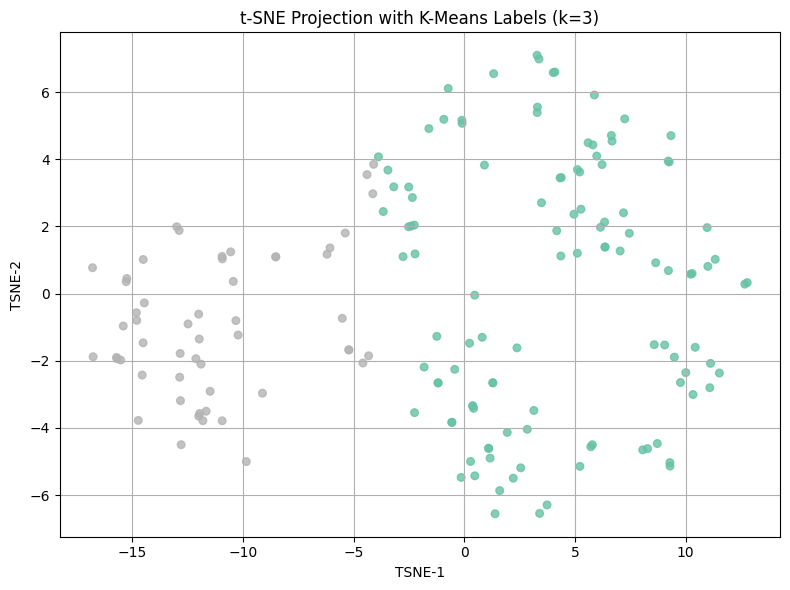

In [223]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='Set2', s=30, alpha=0.8)
plt.title("t-SNE Projection with K-Means Labels (k=3)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [224]:
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k = {k}, silhouette score = {score:.3f}")

k = 2, silhouette score = 0.269
k = 3, silhouette score = 0.203
k = 4, silhouette score = 0.220
k = 5, silhouette score = 0.228
k = 6, silhouette score = 0.219
k = 7, silhouette score = 0.211
k = 8, silhouette score = 0.207


C:\Users\New\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

In [225]:
df['cluster'] = labels
df.groupby('cluster')[[
    'treatment_gap_score',
    'hidden_vulnerability'
    
]].mean().T

cluster,0,1,2,3,4,5,6,7
treatment_gap_score,-0.102941,0.150,0.052632,0.291667,0.339286,0.141304,0.425,0.316667
hidden_vulnerability,0.117647,0.225,0.105263,0.000000,0.000000,0.217391,0.000,0.000000
